In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("inception.csv")

In [2]:
def literal_return(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val

In [3]:
for col in list(df.columns):
    df[col] = df.apply(lambda x: literal_return(str(x[col])),axis=1)

In [4]:
d_mnist_opt = df[['main_accuracy','val_main_accuracy','loss','opt','test_accuracy']][0:3]
d_cifar_opt = df[['main_accuracy','val_main_accuracy','loss','opt','test_accuracy']][3:6]

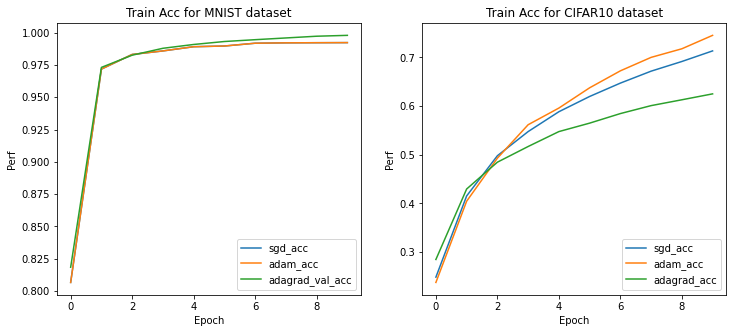

In [5]:
fig = plt.figure(figsize=(12,5))
subfig = fig.add_subplot(121)
subfig.plot(d_mnist_opt['main_accuracy'][0] ,label="sgd_acc")
subfig.plot(d_mnist_opt['main_accuracy'][1] ,label="adam_acc")
subfig.plot(d_mnist_opt['main_accuracy'][2] ,label="adagrad_val_acc")
subfig.set_title('Train Acc for MNIST dataset')
subfig.set_xlabel('Epoch')
subfig.set_ylabel('Perf')
subfig.legend(loc='lower right')
subfig = fig.add_subplot(122)
subfig.plot(d_cifar_opt['main_accuracy'][3] ,label="sgd_acc")
subfig.plot(d_cifar_opt['main_accuracy'][4] ,label="adam_acc")
subfig.plot(d_cifar_opt['main_accuracy'][5] ,label="adagrad_acc")
subfig.set_title('Train Acc for CIFAR10 dataset')
subfig.set_xlabel('Epoch')
subfig.set_ylabel('Perf')
subfig.legend(loc='lower right')

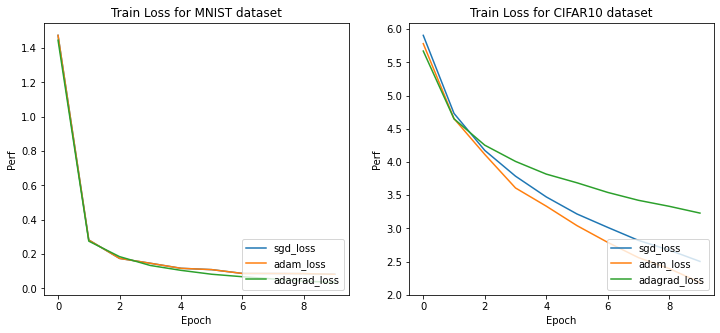

In [6]:
fig = plt.figure(figsize=(12,5))
subfig = fig.add_subplot(121)
subfig.plot(d_mnist_opt['loss'][0] ,label="sgd_loss")
subfig.plot(d_mnist_opt['loss'][1] ,label="adam_loss")
subfig.plot(d_mnist_opt['loss'][2] ,label="adagrad_loss")
subfig.set_title('Train Loss for MNIST dataset')
subfig.set_xlabel('Epoch')
subfig.set_ylabel('Perf')
subfig.legend(loc='lower right')
subfig = fig.add_subplot(122)
subfig.plot(d_cifar_opt['loss'][3] ,label="sgd_loss")
subfig.plot(d_cifar_opt['loss'][4] ,label="adam_loss")
subfig.plot(d_cifar_opt['loss'][5] ,label="adagrad_loss")
subfig.set_title('Train Loss for CIFAR10 dataset')
subfig.set_xlabel('Epoch')
subfig.set_ylabel('Perf')
subfig.legend(loc='lower right')

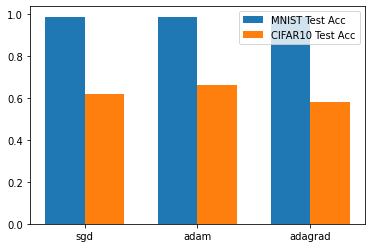

In [7]:
# d_mnist_opt[['opt','test_accuracy']].bar()
width = 0.35
ind= np.arange(len(d_mnist_opt[['opt']]))
plt.bar(ind, list(d_mnist_opt['test_accuracy'].values), width, label='MNIST Test Acc')
plt.bar(ind + width, list(d_cifar_opt['test_accuracy'].values), width,
    label='CIFAR10 Test Acc')
plt.xticks(ind + width / 2, d_mnist_opt['opt'].values)
plt.legend(loc='best')
plt.show()

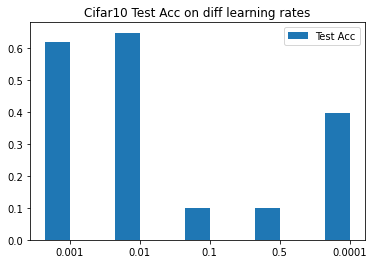

,opt,dataset,lr_rate,test_accuracy
3,sgd,cifar10,0.0010,0.6180
6,sgd,cifar10,0.0100,0.6478
7,sgd,cifar10,0.1000,0.1000
8,sgd,cifar10,0.5000,0.1000
9,sgd,cifar10,0.0001,0.3967


In [8]:
frames = [df[['opt','dataset','lr_rate','test_accuracy']][3:4],df[['opt','dataset','lr_rate','test_accuracy']][6:10]]
d_lr_rate = pd.concat(frames,ignore_index=False)#.reset_index(drop=True)

width = 0.35
ind= np.arange(len(d_lr_rate[['lr_rate']]))
plt.bar(ind, list(d_lr_rate['test_accuracy'].values), width, label='Test Acc')
plt.xticks(ind + width / 2, d_lr_rate['lr_rate'].values)
plt.legend(loc='best')
plt.title('Cifar10 Test Acc on diff learning rates')
plt.show()
d_lr_rate

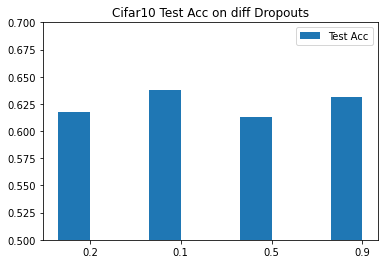

,opt,dataset,dropout_rate,test_accuracy
3,sgd,cifar10,0.2,0.6180
13,sgd,cifar10,0.1,0.6374
14,sgd,cifar10,0.5,0.6129
15,sgd,cifar10,0.9,0.6316


In [10]:
frames = [df[['opt','dataset','dropout_rate','test_accuracy']][3:4],df[['opt','dataset','dropout_rate','test_accuracy']][13:16]]
d_drp_rate = pd.concat(frames,ignore_index=False)#.reset_index(drop=True)
width = 0.35
ind= np.arange(len(d_drp_rate[['dropout_rate']]))
plt.bar(ind, list(d_drp_rate['test_accuracy'].values), width, label='Test Acc')
plt.xticks(ind + width / 2, d_drp_rate['dropout_rate'].values)
plt.ylim([0.5,0.7])
plt.legend(loc='best')
plt.title('Cifar10 Test Acc on diff Dropouts')
plt.show()
d_drp_rate